# Structural keys

As usual going as in lecture, with a bit of visualization of data.

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

with open('data/CHEMBL27-chembl_27_activity-Or8O5vK6yNZ1L5id7ev7PGK1lWhfDfRKRJbbuXPM9Os=.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    cnr1_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [16:38:53] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:38:53] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:38:53] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:38:53] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:38:53] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:38:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:38:54] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [16:38:54] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:38:54] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:38:54] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [16:38:54] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:38:54] Can't kek

RDKit ERROR: [16:38:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [16:38:55] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:38:55] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [16:38:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:38:55] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [16:38:55] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [16:38:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [16:38:55] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [16:38:55] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [16:38:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [16:38:55] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [16:38:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:38:57] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:38:57] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [16:38:57] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:38:57] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [16:38:57] ERROR: Could not sanitize molecule ending on line 1151592


In the begining I tryed some agonists and antagonists of CNR1, but somehow it didn't match good... so i took toulene(kinda) and inoline as groups that had to be in some agonists e.g. aminoalkylindoles etc. and some the most obtained groups in dgugs as acetaldehyde and carboxyl ones.

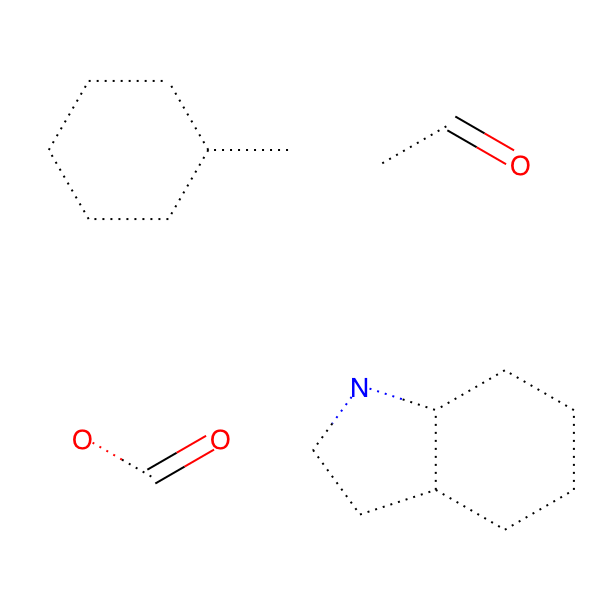

In [2]:
toulene = Chem.MolFromSmarts('CC1CCCCC1') #idk y, but actually can't find toluene structure CC1=CC=CC=C1 in my set, trough i'm sure there is... same with inolide 
acetaldehyde = Chem.MolFromSmarts('CC=O')
cooh = Chem.MolFromSmarts('C(=O)[O;h1]')
inolide = Chem.MolFromSmarts('N1CCC2CCCCC12')
custom_key = [toulene, acetaldehyde, cooh, inolide]
Draw.MolsToGridImage(custom_key, molsPerRow=2, subImgSize=(300,300))

In [3]:
cnr1_ligands_keys = [[m.HasSubstructMatch(substruct) for substruct in custom_key] for m in cnr1_ligands]
len(cnr1_ligands_keys), cnr1_ligands_keys


(2698,
 [[False, False, False, False],
  [False, False, False, False],
  [True, True, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, True, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [True, False, False, False],
  [False, True, True, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, True, False, False],
  [False, False, False, False],
  [False, True, False, False],
  [False, False, False, False],
  [False, True, True, False],
  [False, True, False, False],
  [True, False, False, False],
  [False, False, False, False],
  [False, True, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, True, False, False],
  [True, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, True, True, False],
  [False, False, Fal

In [4]:
import pandas as pd
df = pd.DataFrame(data = {'set':'cnr1',
                        'toulene': [item[0] for item in cnr1_ligands_keys],
                        'acetaldehyde': [item[1] for item in cnr1_ligands_keys],
                        'cooh': [item[2] for item in cnr1_ligands_keys],
                        'inoline': [item[3] for item in cnr1_ligands_keys]})

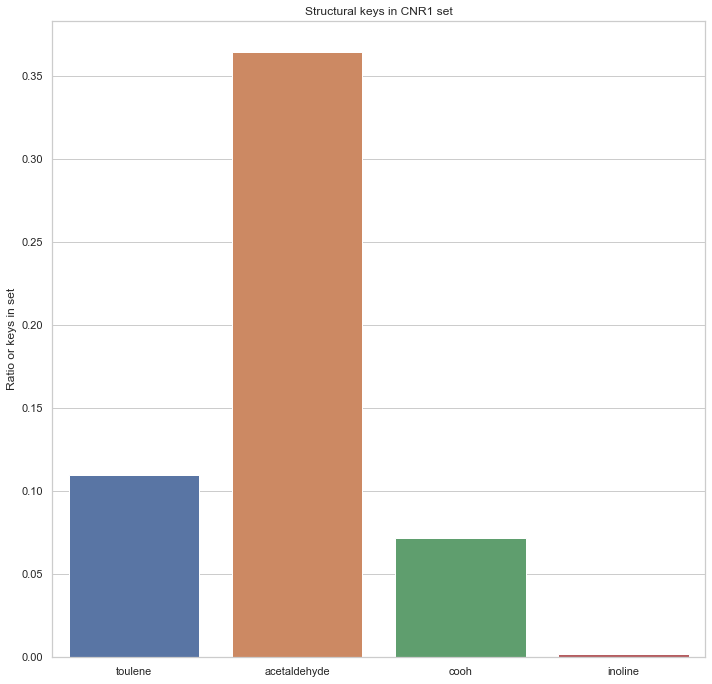

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df, ci=None)
    p.set_title("Structural keys in CNR1 set")
    p.set_ylabel("Ratio or keys in set")

In [6]:
f = 0
for m in drugs:
    if m.HasSubstructMatch(acetaldehyde):
        f+=1
f

3342

In [7]:
drug_ligands_keys = [[m.HasSubstructMatch(substruct) for substruct in custom_key] for m in drugs]
len(drug_ligands_keys), drug_ligands_keys

(7113,
 [[False, True, True, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, True, False, False],
  [False, False, False, False],
  [False, True, False, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, False, False, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, True, False, False],
  [False, False, False, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, False, False, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, True, True, False],
  [True, False, False, False],
  [False, False, False, False],
  [False, True, True, False],
  [False, True, True, False],
  [False, Fals

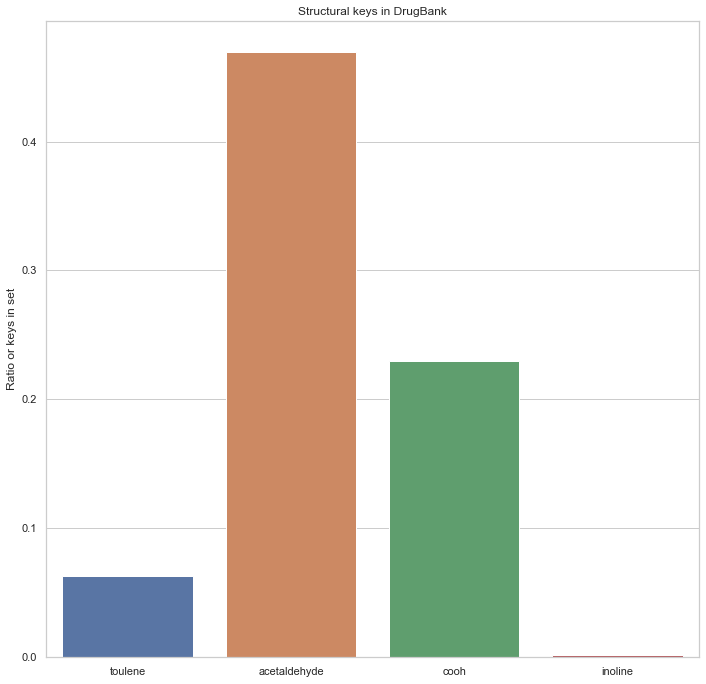

In [8]:
df_drugs = pd.DataFrame(data = {'set':'drugbank',
                        'toulene': [item[0] for item in drug_ligands_keys],
                        'acetaldehyde': [item[1] for item in drug_ligands_keys],
                        'cooh': [item[2] for item in drug_ligands_keys],
                        'inoline': [item[3] for item in drug_ligands_keys]})

sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df_drugs, ci=None)
    p.set_title("Structural keys in DrugBank")
    p.set_ylabel("Ratio or keys in set")

In [9]:
from rdkit.Chem import MACCSkeys
cnr1_maccs = [MACCSkeys.GenMACCSKeys(m) for m in cnr1_ligands]
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugs]
cnr1_maccs[0]

In [10]:
cnr1_maccs[0].GetNumBits()

167

In [11]:
list(cnr1_maccs[0].GetOnBits())

[32,
 33,
 37,
 43,
 51,
 53,
 55,
 58,
 59,
 60,
 61,
 64,
 65,
 67,
 69,
 73,
 74,
 77,
 80,
 81,
 88,
 89,
 94,
 97,
 98,
 102,
 106,
 110,
 112,
 117,
 121,
 124,
 125,
 130,
 131,
 133,
 135,
 136,
 137,
 141,
 142,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 154,
 156,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165]

In [12]:
cnr1_maccs[0].GetBit(32), cnr1_maccs[0].GetBit(33)

(True, True)

In [13]:
cnr1_ligands_maccs_sums = [0]*cnr1_maccs[0].GetNumBits() # a list of zeros of a given length
for key in cnr1_maccs:
    for onbit in key.GetOnBits():
        cnr1_ligands_maccs_sums[onbit] += 1
cnr1_ligands_maccs_sums

[0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 25,
 0,
 1,
 64,
 1,
 4,
 5,
 1,
 7,
 56,
 0,
 106,
 0,
 4,
 139,
 52,
 50,
 113,
 75,
 18,
 44,
 11,
 13,
 0,
 347,
 350,
 22,
 4,
 233,
 235,
 537,
 52,
 71,
 273,
 513,
 165,
 7,
 41,
 70,
 141,
 62,
 77,
 174,
 432,
 635,
 309,
 353,
 417,
 29,
 527,
 418,
 405,
 417,
 437,
 1331,
 34,
 388,
 1516,
 736,
 445,
 19,
 423,
 76,
 92,
 460,
 437,
 651,
 1370,
 192,
 889,
 219,
 1227,
 1236,
 584,
 586,
 1258,
 321,
 1157,
 949,
 1339,
 676,
 574,
 1197,
 1061,
 1639,
 657,
 957,
 1314,
 1358,
 1428,
 1558,
 273,
 1482,
 1122,
 524,
 1192,
 1126,
 1162,
 894,
 1483,
 529,
 627,
 1850,
 1581,
 1214,
 1032,
 420,
 636,
 708,
 1986,
 1564,
 251,
 1654,
 1984,
 1567,
 479,
 1040,
 2089,
 797,
 1285,
 1300,
 1421,
 645,
 1032,
 1002,
 1427,
 1518,
 1175,
 982,
 2155,
 1141,
 783,
 616,
 687,
 2083,
 1285,
 1715,
 2276,
 1142,
 1612,
 1730,
 1171,
 1874,
 1784,
 1250,
 1797,
 2141,
 1563,
 2326,
 1481,
 2276,
 1822,
 1822,
 2406,
 2464,
 2568,
 2530,
 2602,
 3

In [14]:
drugbank_maccs_sums = [0]*drugbank_maccs[0].GetNumBits() # a list of zeros of a given length
for key in drugbank_maccs:
    for onbit in key.GetOnBits():
        drugbank_maccs_sums[onbit] += 1
drugbank_maccs_sums

[0,
 0,
 0,
 30,
 0,
 1,
 11,
 24,
 99,
 46,
 22,
 117,
 30,
 60,
 33,
 11,
 52,
 77,
 68,
 282,
 7,
 21,
 181,
 212,
 435,
 564,
 224,
 96,
 149,
 726,
 126,
 21,
 431,
 481,
 153,
 44,
 625,
 521,
 1312,
 153,
 167,
 166,
 698,
 1198,
 266,
 246,
 194,
 455,
 869,
 713,
 646,
 601,
 553,
 1895,
 2246,
 663,
 178,
 1633,
 669,
 604,
 685,
 695,
 1753,
 207,
 624,
 2507,
 1118,
 782,
 133,
 1551,
 295,
 526,
 2196,
 755,
 1184,
 2092,
 797,
 2245,
 703,
 2263,
 2296,
 1228,
 2080,
 2781,
 2109,
 2498,
 1685,
 1310,
 1596,
 2474,
 3533,
 3342,
 2825,
 1650,
 1481,
 3191,
 3098,
 2783,
 3056,
 1145,
 2845,
 2775,
 1934,
 786,
 3210,
 2939,
 2665,
 1534,
 1732,
 2372,
 3113,
 3377,
 2725,
 2292,
 1097,
 1828,
 1896,
 3354,
 3347,
 924,
 3223,
 3762,
 2973,
 2791,
 2463,
 3448,
 2547,
 3821,
 2689,
 2850,
 1791,
 4638,
 3554,
 2717,
 1637,
 2198,
 3264,
 4492,
 2581,
 4291,
 3262,
 1352,
 4169,
 3821,
 2802,
 3698,
 4375,
 3396,
 3793,
 2507,
 3939,
 4407,
 3963,
 4550,
 4670,
 4851,
 5254

In [15]:
cnr1_ligands_maccs_scaled = [x/len(cnr1_maccs) for x in cnr1_ligands_maccs_sums]
cnr1_ligands_maccs_scaled

[0.0,
 0.0,
 0.0,
 0.0007412898443291327,
 0.0,
 0.0,
 0.0,
 0.0,
 0.009266123054114159,
 0.0,
 0.00037064492216456633,
 0.023721275018532245,
 0.00037064492216456633,
 0.0014825796886582653,
 0.0018532246108228317,
 0.00037064492216456633,
 0.0025945144551519643,
 0.020756115641215715,
 0.0,
 0.039288361749444035,
 0.0,
 0.0014825796886582653,
 0.05151964418087472,
 0.01927353595255745,
 0.018532246108228317,
 0.041882876204596,
 0.027798369162342476,
 0.006671608598962194,
 0.01630837657524092,
 0.00407709414381023,
 0.004818383988139363,
 0.0,
 0.1286137879911045,
 0.12972572275759822,
 0.00815418828762046,
 0.0014825796886582653,
 0.08636026686434396,
 0.08710155670867309,
 0.19903632320237213,
 0.01927353595255745,
 0.02631578947368421,
 0.10118606375092662,
 0.19014084507042253,
 0.06115641215715345,
 0.0025945144551519643,
 0.01519644180874722,
 0.025945144551519646,
 0.052260934025203855,
 0.022979985174203115,
 0.02853965900667161,
 0.06449221645663454,
 0.16011860637509265,
 

In [16]:
drugbank_maccs_scaled = [x/len(drugbank_maccs) for x in drugbank_maccs_sums]
drugbank_maccs_scaled

[0.0,
 0.0,
 0.0,
 0.004217629692113032,
 0.0,
 0.00014058765640376775,
 0.0015464642204414453,
 0.003374103753690426,
 0.013918177983973008,
 0.006467032194573317,
 0.0030929284408828905,
 0.016448755799240825,
 0.004217629692113032,
 0.008435259384226065,
 0.004639392661324336,
 0.0015464642204414453,
 0.007310558132995923,
 0.010825249543090117,
 0.009559960635456208,
 0.0396457191058625,
 0.0009841135948263741,
 0.0029523407844791226,
 0.025446365809081963,
 0.029804583157598763,
 0.06115563053563897,
 0.079291438211725,
 0.03149163503444397,
 0.013496415014761703,
 0.020947560804161394,
 0.10206663854913539,
 0.017714044706874738,
 0.0029523407844791226,
 0.0605932799100239,
 0.0676226627302123,
 0.021509911429776464,
 0.006185856881765781,
 0.08786728525235485,
 0.07324616898636299,
 0.1844510052017433,
 0.021509911429776464,
 0.023478138619429215,
 0.023337550963025446,
 0.0981301841698299,
 0.16842401237171375,
 0.03739631660340222,
 0.03458456347532687,
 0.027274005342330942,


In [17]:
cnr1_drugbank_differences = [(i, a_b[0] - a_b[1])
                             for i, a_b in enumerate(zip(cnr1_ligands_maccs_scaled, drugbank_maccs_scaled))]
cnr1_drugbank_differences.sort(key=lambda x: x[1])
cnr1_drugbank_differences

[(139, -0.31304665957371197),
 (131, -0.2695399907268423),
 (140, -0.23027966313571752),
 (123, -0.2148412313060885),
 (146, -0.19179449565454915),
 (157, -0.18958182936326928),
 (54, -0.1849222187587704),
 (84, -0.17752234734072037),
 (53, -0.15188432793628887),
 (72, -0.13823382926697347),
 (89, -0.13506367662046032),
 (132, -0.1282623188500951),
 (159, -0.12251990190754203),
 (43, -0.1072676002145603),
 (155, -0.1026727078714601),
 (109, -0.10107955479255401),
 (48, -0.09919068824067105),
 (29, -0.09798954440532516),
 (136, -0.09490479693629378),
 (152, -0.09384272962242374),
 (102, -0.07767858827065408),
 (91, -0.07658968528478693),
 (82, -0.07522440093140104),
 (49, -0.0716993400092148),
 (126, -0.06267275789523707),
 (69, -0.0612686530066322),
 (127, -0.060906710137328846),
 (143, -0.060906710137328846),
 (99, -0.05978680283138746),
 (90, -0.0530342182435255),
 (108, -0.04742665706627014),
 (106, -0.043309543900918734),
 (24, -0.042623384427410656),
 (76, -0.040884537098206164),


The MACCS bits that are least prevalent in our CNR1 ligand set compared to the DrugBank database contents are 139, 131, 140, 123, 146. These bits correspond to structural patterns in the MACCS key definition "OH", "QH", "O">3, "OCO","O">2. The most prevalent MACCS bits in our set of MTOR ligands compared to the DrugBank baseline are 107, 134, 103, 145, 87. These correspond to structural patterns "XA(A)A", "X", "CL", "6M ring" > 1, "X!A$A".